# INTRODUCTION 
* In this kernel, we will learn how to use plotly library.
* Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

**Content**

* [Loading the Data Set](#1)
* [Line Charts on Plotly](#2)
* [Scatter Plot](#3)
* [Bar Plot](#4)
* [Pie Plot](#5)
* [Bubble Plot](#6)
* [Histogram Plot](#7)
* [World Cloud](#8)
* [Box Plot](#9)
* [Scatter Plot Matrix](#10)
* [Inset Plot](#11)
* [3D Scatter Plot](#12)
* [Multiple SubPlots](#13)

<a id="1"></a> <br>
# Loading the Data Set
* In this part we load and explain of Features

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['timesData.csv', 'cwurData.csv', 'shanghaiData.csv', 'school_and_country_table.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv']


In [2]:
timesDatas = pd.read_csv("../input/timesData.csv")

In [3]:
timesDatas.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
timesDatas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


<a id="2"></a> <br>
**Line Charts on Plotly**

*Citation and Teaching vs World Rank of Top 100 Universities*

In [5]:
df = timesDatas.iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
        x = df.world_rank,
        y = df.citations,
        mode = "lines",
        name = "citations",
        marker = dict(color = 'rgba(16,112,2,0.8)'),
        text = df.university_name)

trace2 = go.Scatter(
        x = df.world_rank,
        y = df.teaching,
        mode = "lines+markers",
        name = "teaching",
        marker = dict(color = 'rgba(80,26,80,0.8)'),
        text = df.university_name)

data = [trace1,trace2]
layout = dict(title = "Citiation and Teaching VS World Rank of Top 100 Universities",
              xaxis = dict(title = 'World Rank',ticklen=5,zeroline = False)
             )

fig = dict(data=data,layout=layout)
iplot(fig)

<a id="3"></a> <br>
**Scatter Plot**

*Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years*

In [6]:
df2014 = timesDatas[timesDatas.year == 2014].iloc[:100,:]
df2015 = timesDatas[timesDatas.year == 2015].iloc[:100,:]
df2016 = timesDatas[timesDatas.year == 2016].iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode="markers",
                    name="2014",
                    marker = dict(color = 'rgba(255,128,255,0.8)'),
                    text = df2014.university_name)

trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode="markers",
                    name="2015",
                    marker = dict(color = 'rgba(255,128,2,0.8)'),
                    text = df2015.university_name)


trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode="markers",
                    name="2016",
                    marker = dict(color = 'rgba(0,255 ,200,0.8)'),
                    text = df2016.university_name)


data = [trace1,trace2,trace3]
layout = dict(title='Citiation and Teaching VS World Rank of Top 100 Universities with 2014, 2015, 2016',
             xaxis = dict(title="World Rank",ticklen = 5 ,zeroline = False),
             yaxis = dict(title="Citations",ticklen = 5,zeroline=False))

fig = dict(data=data,layout=layout)
iplot(fig)


<a id="4"></a> <br>
**Bar Plot**

*Citations and teaching of top 3 universities in 2014 (First Example) *

In [7]:
df2014 = timesDatas[timesDatas.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [8]:
trace1 = go.Bar(
            x = df2014.university_name,
            y = df2014.citations,
            name = "citations",
            marker = dict(color = 'rgba(255,174,255,0.5)',
                         line = dict(color = 'rgba(0,0,0)',width = 1.5)),
            text = df2014.country)

trace2 = go.Bar(
            x = df2014.university_name,
            y = df2014.teaching,
            name = "teaching",
            marker = dict(color = 'rgba(255,255,128,0.5)',
                         line = dict(color = 'rgba(0,0,0)',width = 1.5)),
            text = df2014.country)

data = [trace1,trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data , layout = layout)
iplot(fig)



*Citations and teaching of top 3 universities in 2014 (Second Example) *

In [9]:
df2015 = timesDatas[timesDatas.year == 2015].iloc[:3,:]
df2015

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54,2015


In [10]:
x = df2015.university_name

trace1 = {
        'x' : x,
        'y' : df2015.citations,
        'name' : 'citation',
        'type' : 'bar'
};

trace1 = {
        'x' : x,
        'y' : df2015.teaching,
        'name' : 'teaching',
        'type' : 'bar'
};

data = [trace1,trace2]
layout = {
    'xaxis' : {'title': 'Top 3 Universities'},
    'barmode' : 'relative',
    'title' : 'citations and teaching of top 3 university in 2014-2015'
};

fig = go.Figure(data = data , layout = layout)
iplot(fig)


<a id="5"></a> <br>
**Pie Plot**

*Students rate of top 7 universities in 2016*

In [11]:
df2016 = timesDatas[timesDatas.year == 2016].iloc[:7,:]
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
world_rank                7 non-null object
university_name           7 non-null object
country                   7 non-null object
teaching                  7 non-null float64
international             7 non-null object
research                  7 non-null float64
citations                 7 non-null float64
income                    7 non-null object
total_score               7 non-null object
num_students              7 non-null object
student_staff_ratio       7 non-null float64
international_students    7 non-null object
female_male_ratio         6 non-null object
year                      7 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 840.0+ bytes


In [12]:
pie1 = df2016.num_students
pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]
labels = df2016.university_name
fig = {
    "data" : [
        {
            "values" : pie1_list,
            "labels" : labels,
            "domain" : {"x" : [0,.5]},
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label+percent+name",
            "hole" : .3,
            "type" : "pie"
        },],
    "layout":{
        "title" : "Universities Number of Students rates",
        "annotations" : [
            {
                "font" : { "size" : 20},
                "showarrow" : False,
                "text" : "Number of Students",
                "x" : 0.20,
                "y" : 1
            },
        ]
    }
}

iplot(fig)


<a id="6"></a> <br>
**Bubble Plot**

*University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016*

In [13]:
df2014 = timesDatas[timesDatas.year == 2014].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2014.num_students]
international_color = [float(each) for each in df2014.international]
data = [
    {
        'y': df2014.teaching,
        'x': df2014.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2014.university_name    
    }
]
iplot(data)

<a id="7"></a> <br>
** Histogram Plot**

*Students-staff ratio in 2011 and 2012 years.*

In [14]:
df2011 = timesDatas.student_staff_ratio[timesDatas.year == 2011]
df2012 = timesDatas.student_staff_ratio[timesDatas.year == 2012]

trace1 = go.Histogram(
    x = df2011,
    opacity = 0.75,
    name = "2011",
    marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(
    x = df2012,
    opacity = 0.75,
    name = "2012",
    marker = dict(color = 'rgba(12,50,196,0.6)'))

data = [trace1,trace2]
layout = go.Layout(barmode = 'overlay',
                   title="students-staff ratio in 2011 and 2012",
                   xaxis = dict(title='students-staff ratio'),
                   yaxis = dict(title='Count'),
                  )

fig = go.Figure(data = data , layout = layout)
iplot(fig)

<a id="8"></a> <br>
**World Cloud**

*Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.*

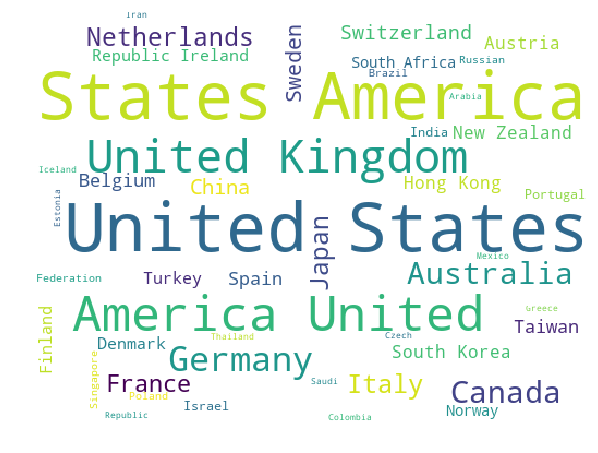

In [15]:
df2013 = timesDatas.country[timesDatas.year == 2013]
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                    background_color = 'white',
                    width = 512,
                    height = 384).generate(" ".join(df2013))


plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()

<a id="9"></a> <br>
**Box Plot**

Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)

*25th percentile = quartile 1 (Q1) that is lower quartile
*75th percentile = quartile 3 (Q3) that is higher quartile
*height of box = IQR = interquartile range = Q3-Q1
*Whiskers = 1.5 * IQR from the Q1 and Q3
*Outliers = being more than 1.5*IQR away from median commonly.

trace = box
y = data we want to visualize with box plot
marker = color

In [16]:
df2013 = timesDatas[timesDatas.year == 2013]

trace0 = go.Box(
    y = df2013.total_score,
    name = 'total score of universities in 2013',
    marker = dict(color = 'rgba(12,12,140)',))


trace1 = go.Box(
    y = df2013.research,
    name = 'research score of universities in 2013',
    marker = dict(color = 'rgba(12,128,128)',))

data = [trace0,trace1]
iplot(data)

<a id="10"></a> <br>
**Scatter Plot Matrix**

*Let's see covariance and relation between more than 2 features*

In [17]:
import plotly.figure_factory as ff
df2014 = timesDatas[timesDatas.year == 2014]

data2014 = df2014.loc[:,["research","international","total_score"]]

data2014["index"] = np.arange(1,len(data2014)+1)

fig = ff.create_scatterplotmatrix(data2014,diag="box",index="index",
                                  colormap="Portland",colormap_type="cat",
                                  height=700,width=900)

iplot(fig)



<a id="11"></a> <br>
**Inset Plot**

*Inset Matrix = 2 plots are in one frame*

In [18]:
trace1 = go.Scatter(
    x = df2014.world_rank,
    y = df2014.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16,112,2,0.8)'),)

trace2 = go.Scatter(
    x = df2014.world_rank,
    y = df2014.income,
    name = "income",
    xaxis="x2",
    yaxis="y2",
    marker = dict(color = 'rgba(160,12,2,0.8)'),)

data = [trace1,trace2]
layout = go.Layout(
        xaxis2 = dict(
            domain = [0.6,0.95],
            anchor='y2',
        ),
        yaxis2 = dict(
            domain = [0.6,0.95],
            anchor = 'x2',
        ),
    title = "Income and Teaching"
           
)

fig = go.Figure(data = data, layout=layout)
iplot(fig)



<a id="12"></a> <br>
**3D Scatter Plot**

* *go.Scatter3d: create 3d scatter plot*
* *x,y,z: axis of plots*
* *mode: market that is scatter*
* *size: marker size*
* *color: axis of colorscale*
* *colorscale: actually it is 4th dimension*

In [19]:
trace1 = go.Scatter3d(
    x=df2014.world_rank,
    y=df2014.research,
    z=df2014.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='palegreen',                # set color to an array/list of desired values      
    )
)

data =  [trace1]
layout = go.Layout(
    margin = dict(l=0,r=0,b=0,t=0)
)
fig = go.Figure(data = data , layout = layout)
iplot(fig)


<a id="13"></a> <br>
**Multiple SubPlots**

*While comparing more than one features, multiple subplots can be useful.*

In [20]:
 trace1 = go.Scatter(
     x = df2014.world_rank,
     y = df2014.research,
     name = "research"
 )
    
trace2 = go.Scatter(
     x = df2014.world_rank,
     y = df2014.citations,
     xaxis="x2",
     yaxis="y2",
     name = "citations"
)

trace3 = go.Scatter(
     x = df2014.world_rank,
     y = df2014.income,
     xaxis="x3",
     yaxis="y3",
     name = "income"
)

trace4 = go.Scatter(
     x = df2014.world_rank,
     y = df2014.total_score,
     xaxis="x4",
     yaxis="y4",
     name = "total_score"
)

data = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    xaxis = dict(domain=[0,0.45]),
    yaxis = dict(domain=[0,0.45]),
    xaxis2 = dict(domain=[0.55,1]),
    yaxis2 = dict(domain=[0,0.45],anchor='x2'),
    xaxis3 = dict(domain=[0,0.45],anchor='y3'),
    yaxis3 = dict(domain=[0.55,1]),
    xaxis4 = dict(domain=[0.55,1],anchor='y4'),
    yaxis4 = dict(domain=[0.55,1],anchor='x4'),
    title = "Research,citation,income and total score"
)

fig = go.Figure(data = data , layout = layout)
iplot(fig)
